In [8]:
import tensorflow as tf
import os



In [13]:
#avoids an OOM error that is out of memory error by setting GPU Memory consumption growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu, True)


In [14]:
gpus

[]

In [15]:
#Removing dodgy images


In [17]:
import cv2
import imghdr

In [18]:
data_dir = 'data'

In [19]:
image_exts = ['png','bmp','jpeg','jpg']

In [22]:
image_exts[2]

'jpeg'

In [24]:
os.listdir(os.path.join(data_dir,'happy'))

['1902540.jpg',
 '1HEoLBLidT2u4mhJ0oiDgig.png',
 '1rOrTgNQABn0P7dy3IrNDjg.jpeg',
 '2560px-Happy_People.jpg',
 '8fc39ae2301e4355a91340731ed2198f_320_320.jpeg',
 'Dollarphotoclub_76084977-1.jpg',
 'friends-happy-190821.jpg',
 'friends_190412.jpg',
 'GettyImages-871518740.jpg',
 'getty_107808336_9708069704500170_50554.jpg',
 'getty_143919450_9706479704500104_51510.jpg',
 'getty_152414899_97046097045006_68075.jpg',
 'getty_478389113_970647970450091_99776.jpg',
 'getty_494581822_130796.jpg',
 'getty_505175324_2000131020009280246_158016.jpg',
 'group-of-happy-people-2.jpg',
 'habits-of-happy-people.jpg',
 'happy-190806-800x450.jpg',
 'happy-people3.jpg',
 'happy.jpg',
 'Happy20People.jpg',
 'happypeople-1024x679.jpg',
 'hdptcar-fi-2.jpg',
 'nm-how-happiness-affects-health-feature.jpg',
 'o-happy-old-people-facebook-1038x519.jpg',
 'pexels-photo-1999504.jpeg',
 'physed-happiness-videoSixteenByNine3000.jpg',
 'smile.woman_.jpg',
 'tmp_6mv7xy_5d5b15258a507669_GettyImages-847741712.jpg']

In [25]:
#IMAGE cleaning
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path = os.path.join(data_dir,image_class,image)
        try:
            img = cv2.imread(image_path)
            tip =imghdr.what(image_path)
            if tip not in image_exts:
                print('Image not in the ext list{}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with Image{}'.format(image_path))
            #OS.remove (image path)

Image not in the ext listdata\happy\1rOrTgNQABn0P7dy3IrNDjg.jpeg
Image not in the ext listdata\happy\2560px-Happy_People.jpg
Image not in the ext listdata\happy\31418025-diverse-happy-people.jpg
Image not in the ext listdata\happy\56f455011e0000b300705475.jpeg
Image not in the ext listdata\happy\guilherme-stecanella-375176-unsplash.jpg
Image not in the ext listdata\happy\Happy20People.jpg
Image not in the ext listdata\happy\portrait-young-father-carrying-his-260nw-736997836.jpg
Image not in the ext listdata\happy\sjnv_cnh7ugnaddm7so6sq.jpg
Image not in the ext listdata\happy\traitshappypeople.jpg
Image not in the ext listdata\happy\young-woman-curly-hair-laughing-260nw-1687578475.jpg
Image not in the ext listdata\sad\39843138-sad-man.jpg
Image not in the ext listdata\sad\african-american-depressive-sad-broken-260nw-475790911.jpg
Image not in the ext listdata\sad\crying-sad.gif
Image not in the ext listdata\sad\depositphotos_25235121-stock-photo-sad-crying-disappointed-funny-business.jp

In [26]:
#Load data

In [28]:
import numpy as np
from matplotlib import pyplot as plt

In [55]:
data = tf.keras.utils.image_dataset_from_directory('data')

Found 150 files belonging to 2 classes.


In [30]:
data_iterator = data.as_numpy_iterator()

In [32]:
batch =data_iterator.next()

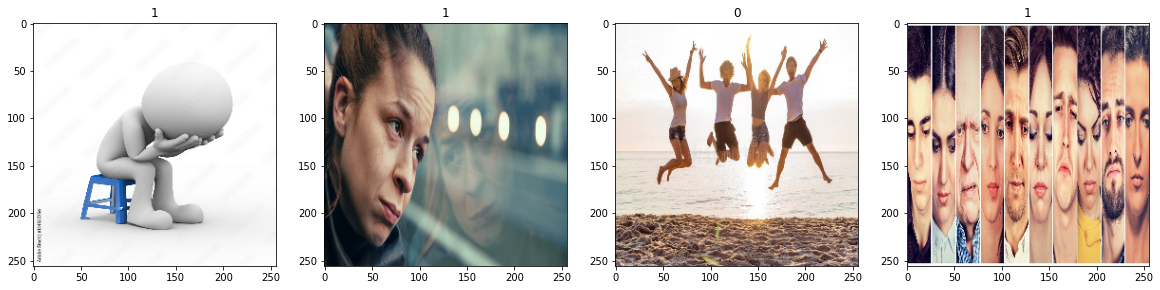

In [39]:
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [37]:
#1 is for sad and 0 is for happy people

In [40]:
#preprocessing 
#Scaling
#splitiing

In [56]:
data = data.map(lambda x, y:(x/255,y))

In [57]:
scaled_iterator = data.as_numpy_iterator()

In [58]:
batch = scaled_iterator.next()

In [59]:
batch[0].max()

1.0

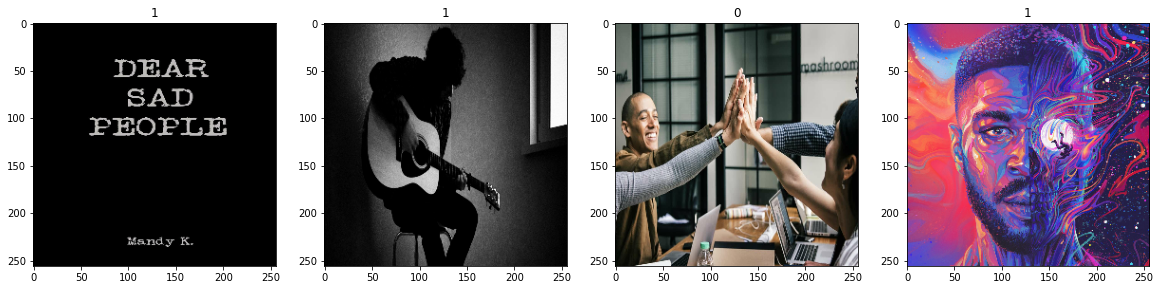

In [63]:
fig,ax =plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [65]:
#Splitting

In [66]:
len(data)

5

In [76]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [77]:
train_size

3

In [78]:
val_size

1

In [79]:
test_size

1

In [80]:
train_size+val_size+test_size

5

In [81]:
train = data.take(train_size)
val= data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [84]:
len(test)

1

In [85]:
#Build a deep learning model

In [86]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [87]:
 model = Sequential()

In [88]:
model.add(Conv2D(16, (3,3),1, activation ='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3),1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3),1, activation ='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [89]:
model.compile('adam', loss =tf.losses.BinaryCrossentropy(), metrics =['accuracy'])

In [90]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [91]:
#TRAIN
#create a log directory

In [92]:
logdir ='logs'

In [93]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = logdir)

In [94]:
hist = model.fit(train, epochs = 20, validation_data = val,callbacks =[tensorboard_callback])

Epoch 1/20
3/3 [==============================] - 8s 2s/step - loss: 1.1205 - accuracy: 0.4896 - val_loss: 0.6913 - val_accuracy: 0.5938
Epoch 2/20
3/3 [==============================] - 7s 2s/step - loss: 0.7446 - accuracy: 0.5312 - val_loss: 0.6880 - val_accuracy: 0.5312
Epoch 3/20
3/3 [==============================] - 6s 2s/step - loss: 0.6916 - accuracy: 0.4792 - val_loss: 0.6833 - val_accuracy: 0.4688
Epoch 4/20
3/3 [==============================] - 6s 2s/step - loss: 0.6747 - accuracy: 0.6146 - val_loss: 0.6673 - val_accuracy: 0.9062
Epoch 5/20
3/3 [==============================] - 6s 2s/step - loss: 0.6590 - accuracy: 0.8125 - val_loss: 0.6335 - val_accuracy: 0.7188
Epoch 6/20
3/3 [==============================] - 6s 2s/step - loss: 0.6244 - accuracy: 0.7812 - val_loss: 0.6258 - val_accuracy: 0.7500
Epoch 7/20
3/3 [==============================] - 6s 2s/step - loss: 0.5855 - accuracy: 0.8021 - val_loss: 0.5868 - val_accuracy: 0.7500
Epoch 8/20
3/3 [=========================

In [95]:
#magic is done

In [97]:
hist.history

{'loss': [1.1205195188522339,
  0.744574785232544,
  0.691591203212738,
  0.6746558547019958,
  0.6589600443840027,
  0.6244171261787415,
  0.5855154991149902,
  0.5580711364746094,
  0.5210241675376892,
  0.4753551483154297,
  0.4435631334781647,
  0.35114648938179016,
  0.31304123997688293,
  0.2566390931606293,
  0.3710959255695343,
  0.2341393679380417,
  0.1920403242111206,
  0.1681922823190689,
  0.14711487293243408,
  0.09033963829278946],
 'accuracy': [0.4895833432674408,
  0.53125,
  0.4791666567325592,
  0.6145833134651184,
  0.8125,
  0.78125,
  0.8020833134651184,
  0.6979166865348816,
  0.7916666865348816,
  0.7708333134651184,
  0.8229166865348816,
  0.8958333134651184,
  0.8645833134651184,
  0.9166666865348816,
  0.84375,
  0.90625,
  0.96875,
  0.9479166865348816,
  0.96875,
  0.96875],
 'val_loss': [0.6913295984268188,
  0.6879854798316956,
  0.6832542419433594,
  0.6672952771186829,
  0.6335330009460449,
  0.6258133053779602,
  0.5867763757705688,
  0.543680071830749

In [98]:
#Plot performance

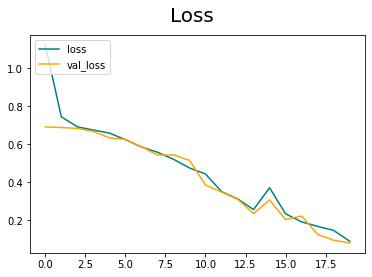

In [100]:
fig = plt.figure()
plt.plot(hist.history['loss'], color = 'teal', label = 'loss')
plt.plot(hist.history['val_loss'],color ='orange', label ='val_loss')
fig.suptitle('Loss', fontsize =20)
plt.legend(loc= "upper left")
plt.show()

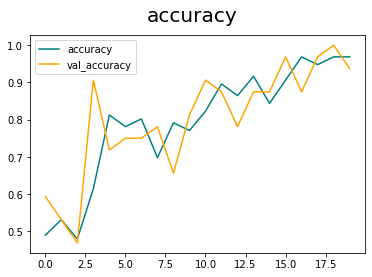

In [101]:
#Accuracy_plot
fig = plt.figure()
plt.plot(hist.history['accuracy'], color = 'teal', label = 'accuracy')
plt.plot(hist.history['val_accuracy'],color ='orange', label ='val_accuracy')
fig.suptitle('accuracy', fontsize =20)
plt.legend(loc= "upper left")
plt.show()

In [102]:
#Evalutate Performance

In [103]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [104]:
pre= Precision()
re = Recall()
acc= BinaryAccuracy()

In [105]:
len(test)

1

In [106]:
for batch in test.as_numpy_iterator():
    x,y = batch
    yhat = model.predict(x)
    pre.update_state(y,yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    

1/1 [==============================] - 0s 260ms/step


In [110]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:1.0, Recall:1.0, Accuracy:1.0


In [111]:
#TESTING

In [112]:
import cv2

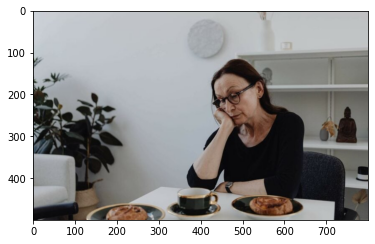

In [126]:
img = cv2.imread('sadtest.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

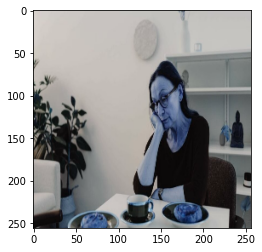

In [127]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [128]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [129]:
yhat = model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 49ms/step


In [130]:
yhat

array([[0.92765975]], dtype=float32)

In [131]:
if yhat>0.5:
    print(f'Predicted class is sad')
else:
    print(f'predicted class is happy')

Predicted class is sad


In [132]:
#Save the model

In [133]:
from tensorflow.keras.models import load_model

In [134]:
model.save(os.path.join('models','happysadmodel.h5'))

In [135]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [137]:
new_model

In [139]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 165ms/step


array([[0.92765975]], dtype=float32)